------------------------------------------
losing
------------------------------------------
p    | GBN             |SRP
     | t     |k        |t    |  k
0.0	 | 1.69  | 1.00    | 1.12  | 1.00   
0.1	 | 4.04  | 0.81    | 2.82  | 0.83   
0.2	 | 4.52  | 0.78    | 4.20  | 0.76   
0.3	 | 12.14  | 0.50    | 5.83  | 0.55   
0.5	 | 15.42  | 0.43    | 7.40  | 0.48   
0.6	 | 27.07  | 0.29    | 9.87  | 0.36   
0.7	 | 40.49  | 0.21    | 18.27  | 0.25   
0.8	 | 75.38  | 0.12    | 31.99  | 0.15   
0.9	 | 188.89  | 0.05    | 64.85  | 0.07   
p
[0.     0.1125 0.225  0.3375 0.45   0.5625 0.675  0.7875 0.9   ]
GBN
[1.6934711933135986, 4.042161464691162, 4.5199058055877686, 12.14082670211792, 15.423006772994995, 27.0703125, 40.48521327972412, 75.3782889842987, 188.88643646240234]
time
k
[1.0, 0.808, 0.7829457364341085, 0.4975369458128079, 0.4297872340425532, 0.29022988505747127, 0.21085594989561587, 0.12362301101591187, 0.05263157894736842]
SRP
[1.1204774379730225, 2.820023536682129, 4.198969602584839, 

C:\Users\1\AppData\Local\Temp\ipykernel_20812\3912173198.py:300: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_20812\3912173198.py:309: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2	 | 8.27  | 0.80    | 3.92  | 0.80   
3	 | 7.58  | 0.63    | 2.85  | 0.71   
4	 | 7.41  | 0.52    | 1.78  | 0.65   
5	 | 5.69  | 0.53    | 2.19  | 0.64   
6	 | 4.44  | 0.53    | 2.23  | 0.64   
7	 | 4.79  | 0.47    | 1.97  | 0.58   
8	 | 3.21  | 0.54    | 1.64  | 0.64   
9	 | 6.77  | 0.31    | 1.33  | 0.44   
10	 | 3.53  | 0.46    | 1.88  | 0.58   
w
range(2, 11)
GBN
[8.274171590805054, 7.584074020385742, 7.408008575439453, 5.689516305923462, 4.442117929458618, 4.793714284896851, 3.212005615234375, 6.766931533813477, 3.531611680984497]
time
k
[0.7952755905511811, 0.6273291925465838, 0.520618556701031, 0.5287958115183246, 0.5287958115183246, 0.46543778801843316, 0.5372340425531915, 0.3079268292682927, 0.463302752293578]
SRP
[3.9173152446746826, 2.85229229927063, 1.7812683582305908, 2.1901745796203613, 2.230910301208496, 1.9717252254486084, 1.6352462768554688, 1.3297982215881348, 1.8752737045288086]
time
k
[0.8047808764940239, 0.7137809187279152, 0.6483870967741936, 0.6352201257861635, 

C:\Users\1\AppData\Local\Temp\ipykernel_20812\3912173198.py:389: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_20812\3912173198.py:398: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


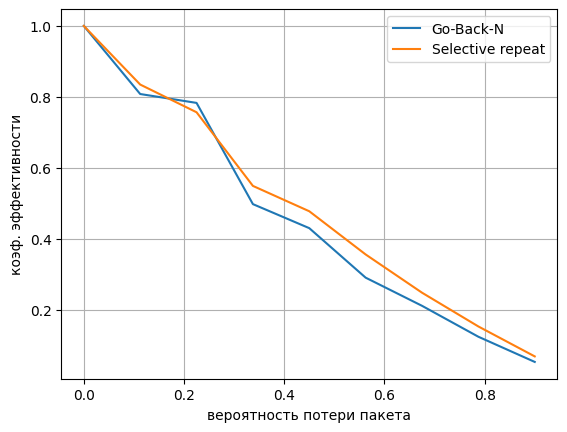

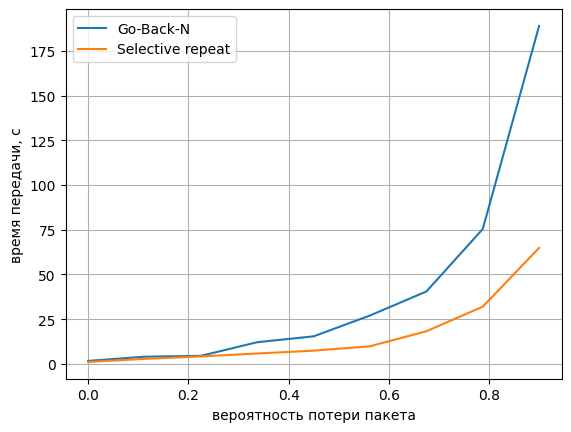

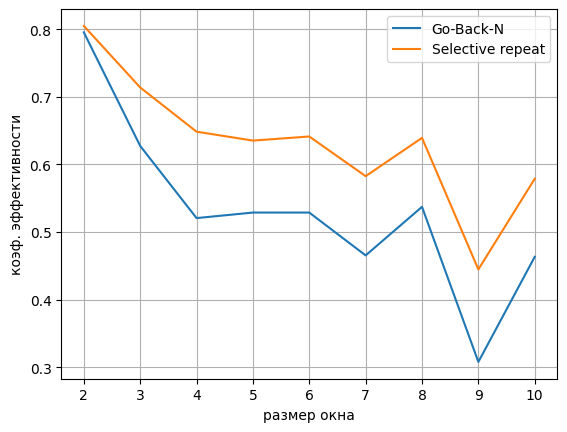

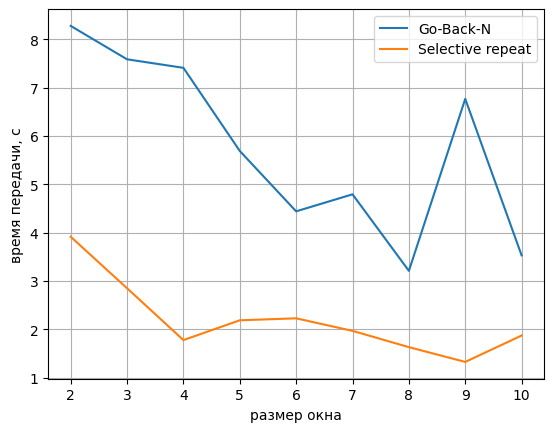

In [1]:
import numpy as np
import enum
import time
from threading import Thread
import matplotlib.pyplot as plt


class MessageStatus(enum.Enum):
    OK = enum.auto()
    LOST = enum.auto()


class Message:
    number = -1
    real_number = -1
    data = ""
    status = MessageStatus.OK

    def __init__(self):
        pass

    def copy(self):
        msg = Message()
        msg.number = self.number
        msg.data = self.data
        msg.status = self.status

    def __str__(self):
        return f"({self.real_number}({self.number}), {self.data}, {self.status})"


class MsgQueue:
    def __init__(self, loss_probability=0.3):
        self.msg_queue = []
        self.loss_probability = loss_probability
        pass

    def has_msg(self):
        if len(self.msg_queue) <= 0:
            return False
        else:
            return True

    def get_message(self):
        if self.has_msg():
            result = self.msg_queue[0]
            self.msg_queue.pop(0)
            return result

    def send_message(self, msg):
        tmp_msg = self.emulating_channel_problems(msg)
        self.msg_queue.append(tmp_msg)

    def emulating_channel_problems(self, msg):
        val = np.random.rand()
        if val <= self.loss_probability:
            msg.status = MessageStatus.LOST

        return msg

    def __str__(self):
        res_str = "[ "
        for i in range(len(self.msg_queue)):
            msg = self.msg_queue[i]
            res_str += f"({msg.number}, {msg.status}), "

        res_str += "]"
        return res_str


def run_go_back_n_sender(window_size, max_number, timeout):
    curr_number = 0
    last_ans_number = -1
    start_time = time.time()
    while last_ans_number < max_number:
        expected_number = (last_ans_number + 1) % window_size

        if answer_msg_queue.has_msg():
            ans = answer_msg_queue.get_message()
            if ans.number == expected_number:
                # последовательное подтверждение пакетов - всё ок
                last_ans_number += 1
                start_time = time.time()
            else:
                # произошёл сбой, нужно повторить отправку сообщений с последнего подтверждённого
                curr_number = last_ans_number + 1

        # долго нет ответа с последнего подтверждения
        if time.time() - start_time > timeout:
            # произошёл сбой, нужно повторить отправку сообщений с последнего подтверждённого
            curr_number = last_ans_number + 1
            start_time = time.time()

        if (curr_number < last_ans_number + window_size) and (curr_number <= max_number):
            #   отправляем не более window_size сообщений наперёд
            k = curr_number % window_size
            msg = Message()
            msg.number = k
            msg.real_number = curr_number
            send_msg_queue.send_message(msg)
            posted_msgs.append(f"{curr_number}({k})")

            curr_number += 1

    msg = Message()
    msg.data = "STOP"
    send_msg_queue.send_message(msg)


def run_go_back_n_receiver(window_size):
    expected_number = 0
    while True:
        if send_msg_queue.has_msg():
            curr_msg = send_msg_queue.get_message()
            #print(f"res: {curr_msg} | {expected_number}")
            if curr_msg.data == "STOP":
                break

            if curr_msg.status == MessageStatus.LOST:
                continue

            if curr_msg.number == expected_number:
                ans = Message()
                ans.number = curr_msg.number
                answer_msg_queue.send_message(ans)

                received_msgs.append(f"{curr_msg.real_number}({curr_msg.number})")
                expected_number = (expected_number + 1) % window_size

            else:
                continue


def run_selective_repeat_sender(window_size, max_number, timeout):
    class WndMsgStatus(enum.Enum):
        BUSY = enum.auto()
        NEED_REPEAT = enum.auto()
        CAN_BE_USED = enum.auto()

    class WndNode:
        def __init__(self, number):
            self.status = WndMsgStatus.NEED_REPEAT
            self.time = 0
            self.number = number
            pass

        def __str__(self):
            return f"( {self.number}, {self.status}, {self.time})"

    wnd_nodes = [WndNode(i) for i in range(window_size)]

    ans_count = 0

    while ans_count < max_number:

        res_str = "["
        for i in range(window_size):
            res_str += wnd_nodes[i].__str__()
        res_str += "]"

        if answer_msg_queue.has_msg():
            ans = answer_msg_queue.get_message()
            ans_count += 1
            wnd_nodes[ans.number].status = WndMsgStatus.CAN_BE_USED

        # долго нет ответа с последнего подтверждения
        curr_time = time.time()
        for i in range(window_size):
            if wnd_nodes[i].number > max_number:
                continue

            send_time = wnd_nodes[i].time
            if curr_time - send_time > timeout:
                # произошёл сбой, нужно повторить отправку этого сообщения
                wnd_nodes[i].status = WndMsgStatus.NEED_REPEAT

        # отправляем новые или повторяем, если необходимо
        for i in range(window_size):
            if wnd_nodes[i].number > max_number:
                continue

            if wnd_nodes[i].status == WndMsgStatus.BUSY:
                continue

            elif wnd_nodes[i].status == WndMsgStatus.NEED_REPEAT:
                wnd_nodes[i].status = WndMsgStatus.BUSY
                wnd_nodes[i].time = time.time()

                msg = Message()
                msg.number = i
                msg.real_number = wnd_nodes[i].number
                send_msg_queue.send_message(msg)
                posted_msgs.append(f"{msg.real_number}({msg.number})")

            elif wnd_nodes[i].status == WndMsgStatus.CAN_BE_USED:
                wnd_nodes[i].status = WndMsgStatus.BUSY
                wnd_nodes[i].time = time.time()
                wnd_nodes[i].number = wnd_nodes[i].number + window_size

                if wnd_nodes[i].number > max_number:
                    continue

                msg = Message()
                msg.number = i
                msg.real_number = wnd_nodes[i].number
                send_msg_queue.send_message(msg)
                posted_msgs.append(f"{msg.real_number}({msg.number})")

    msg = Message()
    msg.data = "STOP"
    send_msg_queue.send_message(msg)


def run_selective_repeat_receiver(window_size):
    while True:
        if send_msg_queue.has_msg():
            curr_msg = send_msg_queue.get_message()

            if curr_msg.data == "STOP":
                break

            if curr_msg.status == MessageStatus.LOST:
                continue

            ans = Message()
            ans.number = curr_msg.number
            answer_msg_queue.send_message(ans)
            received_msgs.append(f"{curr_msg.real_number}({curr_msg.number})")


send_msg_queue = MsgQueue()
answer_msg_queue = MsgQueue()

posted_msgs = []
received_msgs = []


def test_packet_loss():
    global send_msg_queue
    global answer_msg_queue
    global posted_msgs
    global received_msgs

    window_size = 3
    timeout = 0.2
    max_number = 100
    loss_probability_arr = np.linspace(0, 0.9, 9)
    protocol_arr = ["GBN", "SRP"]

    print("p    | GBN             |SRP")
    print("     | t     |k        |t    |  k")

    gbn_time = []
    srp_time = []
    gbn_k = []
    srp_k = []
    for p in loss_probability_arr:
        table_row = f"{p:.1f}\t"
        send_msg_queue = MsgQueue(p)
        answer_msg_queue = MsgQueue(p)
        posted_msgs = []
        received_msgs = []

        for protocol in protocol_arr:
            if protocol == "GBN":
                sender_th = Thread(target=run_go_back_n_sender, args=(window_size, max_number, timeout))
                receiver_th = Thread(target=run_go_back_n_receiver, args=(window_size,))
            elif protocol == "SRP":
                sender_th = Thread(target=run_selective_repeat_sender, args=(window_size, max_number, timeout))
                receiver_th = Thread(target=run_selective_repeat_receiver, args=(window_size,))

            timer_start = time.time()
            sender_th.start()
            receiver_th.start()

            sender_th.join()
            receiver_th.join()
            timer_end = time.time()

            k = len(received_msgs) / len(posted_msgs)
            elapsed = timer_end - timer_start

            table_row += f" | {elapsed:2.2f}  | {k:.2f}   "
            if protocol == "GBN":
                gbn_time.append(elapsed)
                gbn_k.append(k)
            else:
                srp_time.append(elapsed)
                srp_k.append(k)

        print(table_row)

    fig, ax = plt.subplots()
    ax.plot(loss_probability_arr, gbn_k, label="Go-Back-N")
    ax.plot(loss_probability_arr, srp_k, label="Selective repeat")
    ax.set_xlabel('вероятность потери пакета')
    ax.set_ylabel('коэф. эффективности')
    ax.legend()
    ax.grid()
    fig.show()

    fig, ax = plt.subplots()
    ax.plot(loss_probability_arr, gbn_time, label="Go-Back-N")
    ax.plot(loss_probability_arr, srp_time, label="Selective repeat")
    ax.set_xlabel('вероятность потери пакета')
    ax.set_ylabel('время передачи, с')
    ax.legend()
    ax.grid()
    fig.show()

    print("p")
    print(loss_probability_arr)
    print("GBN")
    print(gbn_time)
    print("time")
    print("k")
    print(gbn_k)

    print("SRP")
    print(srp_time)
    print("time")
    print("k")
    print(srp_k)


def test_window_size():
    global send_msg_queue
    global answer_msg_queue
    global posted_msgs
    global received_msgs

    window_size_arr = range(2, 11)
    timeout = 0.2
    max_number = 100
    loss_probability_arr = 0.2
    send_msg_queue = MsgQueue(loss_probability_arr)
    answer_msg_queue = MsgQueue(loss_probability_arr)
    protocol_arr = ["GBN", "SRP"]

    print("w    | GBN             |SRP")
    print("     | t     |k        |t    |  k")

    gbn_time = []
    srp_time = []
    gbn_k = []
    srp_k = []
    for window_size in window_size_arr:
        table_row = f"{window_size:}\t"

        posted_msgs = []
        received_msgs = []

        for protocol in protocol_arr:
            if protocol == "GBN":
                sender_th = Thread(target=run_go_back_n_sender, args=(window_size, max_number, timeout))
                receiver_th = Thread(target=run_go_back_n_receiver, args=(window_size,))
            elif protocol == "SRP":
                sender_th = Thread(target=run_selective_repeat_sender, args=(window_size, max_number, timeout))
                receiver_th = Thread(target=run_selective_repeat_receiver, args=(window_size,))

            timer_start = time.time()
            sender_th.start()
            receiver_th.start()

            sender_th.join()
            receiver_th.join()
            timer_end = time.time()

            k = len(received_msgs) / len(posted_msgs)
            elapsed = timer_end - timer_start

            table_row += f" | {elapsed:2.2f}  | {k:.2f}   "
            if protocol == "GBN":
                gbn_time.append(elapsed)
                gbn_k.append(k)
            else:
                srp_time.append(elapsed)
                srp_k.append(k)

        print(table_row)

    fig, ax = plt.subplots()
    ax.plot(window_size_arr, gbn_k, label="Go-Back-N")
    ax.plot(window_size_arr, srp_k, label="Selective repeat")
    ax.set_xlabel('размер окна')
    ax.set_ylabel('коэф. эффективности')
    ax.legend()
    ax.grid()
    fig.show()

    fig, ax = plt.subplots()
    ax.plot(window_size_arr, gbn_time, label="Go-Back-N")
    ax.plot(window_size_arr, srp_time, label="Selective repeat")
    ax.set_xlabel('размер окна')
    ax.set_ylabel('время передачи, с')
    ax.legend()
    ax.grid()
    fig.show()


    print("w")
    print(window_size_arr)
    print("GBN")
    print(gbn_time)
    print("time")
    print("k")
    print(gbn_k)

    print("SRP")
    print(srp_time)
    print("time")
    print("k")
    print(srp_k)


def main():
    global send_msg_queue
    global answer_msg_queue

    window_size = 2
    max_number = 100
    timeout = 0.5
    loss_probability = 0.3
    protocol = "GBN"
    send_msg_queue = MsgQueue(loss_probability)
    answer_msg_queue = MsgQueue(loss_probability)

    for p in np.linspace(0, 1, 10):
        window_size = 3

    if protocol == "GBN":
        sender_th = Thread(target=run_go_back_n_sender, args=(window_size, max_number, timeout))
        receiver_th = Thread(target=run_go_back_n_receiver, args=(window_size,))
    elif protocol == "SRP":
        sender_th = Thread(target=run_selective_repeat_sender, args=(window_size, max_number, timeout))
        receiver_th = Thread(target=run_selective_repeat_receiver, args=(window_size,))
    else:
        print("unknown protocol: ", protocol)
        return

    sender_th.start()
    receiver_th.start()

    sender_th.join()
    receiver_th.join()

    print(f"posted ({len(posted_msgs)}): \t", posted_msgs)
    print(f"received ({len(received_msgs)}):\t", received_msgs)


if __name__ == '__main__':
    print("------------------------------------------")
    print("losing")
    print("------------------------------------------")
    test_packet_loss()

    print("------------------------------------------")
    print("window")
    print("------------------------------------------")
    test_window_size()

    plt.show()